In [1]:
import requests

try:
  with open('looking_glass.txt') as f:
    text = f.read()

except IOError:
  url = 'http://www.gutenberg.org/cache/epub/12/pg12.txt'
  res = requests.get(url)
  text = res.text
  with open('looking_glass.txt', 'w') as f:
    f.write(str(text))

In [2]:
start = text.find("JABBERWOCKY")  # line number?
end = text.find("It seems very pretty")

In [3]:
poem = text[start:end]
print(poem)

JABBERWOCKY.

’Twas brillig, and the slithy toves
    Did gyre and gimble in the wabe;
All mimsy were the borogoves,
    And the mome raths outgrabe.

“Beware the Jabberwock, my son!
    The jaws that bite, the claws that catch!
Beware the Jubjub bird, and shun
    The frumious Bandersnatch!”

He took his vorpal sword in hand:
    Long time the manxome foe he sought—
So rested he by the Tumtum tree,
    And stood awhile in thought.

And as in uffish thought he stood,
    The Jabberwock, with eyes of flame,
Came whiffling through the tulgey wood,
    And burbled as it came!

One, two! One, two! And through and through
    The vorpal blade went snicker-snack!
He left it dead, and with its head
    He went galumphing back.

“And hast thou slain the Jabberwock?
    Come to my arms, my beamish boy!
O frabjous day! Callooh! Callay!”
    He chortled in his joy.

’Twas brillig, and the slithy toves
    Did gyre and gimble in the wabe;
All mimsy were the borogoves,
    And the mome raths outgra

In [4]:
# Queremos las 10 palabras más comunes
import collections
words = poem.split()

poem_counter = collections.Counter(words)
poem_counter.most_common(10)

[('the', 15),
 ('and', 7),
 ('in', 6),
 ('And', 6),
 ('The', 4),
 ('He', 4),
 ('my', 3),
 ('he', 3),
 ('through', 3),
 ('’Twas', 2)]

In [5]:
for word, count in poem_counter.items(): #Las que solamente aparecen 2 veces
  if count==2:
    print(word)

’Twas
brillig,
slithy
toves
Did
gyre
gimble
wabe;
All
mimsy
were
borogoves,
mome
raths
outgrabe.
Jabberwock,
that
his
vorpal
as
with
it
One,
two!
went


In [6]:
from pandas import DataFrame

book = text # la muestra base
book_counter = collections.Counter(book.split())
n_book = book_counter.total()
book_freq = {k: v/n_book for k, v in book_counter.items()}

n = poem_counter.total()
poem_freq = {k: v for k, v in poem_counter.items()}
stats = [(k, v, book_freq.get(k, 0)*n) for k,v in poem_counter.items()]

df = DataFrame(stats, columns=['words', 'observed', 'expected'])
df['score'] = (df['observed']-df['expected'])**2/df['expected']

df = df.sort_values(['score'], ascending=False).head(n=10)

In [7]:
df

,words,observed,expected,score
100,“,1,0.000000,inf
39,vorpal,2,0.010249,386.295963
72,"One,",2,0.010249,386.295963
21,"Jabberwock,",2,0.010249,386.295963
19,outgrabe.,2,0.015373,256.205850
18,raths,2,0.015373,256.205850
17,mome,2,0.015373,256.205850
15,"borogoves,",2,0.015373,256.205850
13,mimsy,2,0.015373,256.205850
11,wabe;,2,0.015373,256.205850


Preprocesamiento con NLTK es mejor que con string si vamos a terminar usandolo para natural language processing.

In [8]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 720.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.1/785.1 kB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 888.7 kB/s eta 0:00:00 0:00:01


In [9]:
import nltk
nltk.download('punkt')
ss_nltk = nltk.sent_tokenize('this. this paragraph right here. this paragraph is to be tokenized. Oh yes. Token-ized i said.')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
ss_nltk

['this.',
 'this paragraph right here.',
 'this paragraph is to be tokenized.',
 'Oh yes.',
 'Token-ized i said.']

# Getting table from URL

In [11]:
!pip install html5lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 863.5 kB/s eta 0:00:00 0:00:01


In [12]:
import pandas as pd

In [23]:
url = "https://iol.invertironline.com/mercado/cotizaciones/argentina/cedears/todos"
req = requests.get(url)
pd.read_html(req.text, match='Símbolo')[0]

/tmp/ipykernel_337/635832678.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_html(req.text, match='Símbolo')[0]


,Símbolo,Último Operado,Variación Diaria,Cantidad Compra,Precio Compra,Precio Venta,Cantidad Venta,Apertura,Mínimo,Máximo,Último Cierre,Monto Operado,Unnamed: 12
0,AAL AMERICAN AIRLIN...,"6.925,50","-3,30%",-,-,-,-,"7.199,00","6.846,50","7.199,00","6.925,50",19.114.095,NaN
1,AAP Advance Auto Pa...,"5.515,00","-0,56%",-,-,-,-,"5.583,50","5.288,00","5.583,50","5.515,00",6.282.123,NaN
2,AAPL Apple,"9.268,50","0,80%",-,-,-,-,"9.300,00","9.195,00","9.442,50","9.268,50",589.227.694,NaN
3,AAPLC Apple,1750,0%,-,-,-,-,1750,1750,1750,1750,0,NaN
4,AAPLD Apple,919,"-0,43%",-,-,-,-,931,917,950,919,85.463,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,XP XP INC.,"6.110,00","-2,89%",-,-,-,-,"6.255,00","6.110,00","6.255,00","6.110,00",3.701.440,NaN
360,XROX Xerox,"17.655,00","-2,34%",-,-,-,-,"17.828,00","17.655,00","17.828,00","17.655,00",335.741,NaN
361,YELP Yelp Inc,"21.089,00",0%,-,-,-,-,"20.995,00","20.995,00","21.089,00","21.089,00",0,NaN
362,ZM Zoom Video Comm...,"1.367,00","-1,51%",-,-,-,-,"1.380,00","1.367,00","1.399,00","1.367,00",1.333.868,NaN


# Sympy

In [100]:
import sympy as sp
sp.init_printing()

In [36]:
sp.stats.E(sp.stats.Die('X', 6)).evalf()

3.50000000000000

In [37]:
sp.sqrt(8)

2*sqrt(2)

In [40]:
x, y, z, t = sp.symbols('x y z t')

In [46]:
expr = x+2*y
expr2 = x*expr

In [47]:
sp.expand(expr2)

x**2 + 2*x*y

In [48]:
sp.factor(sp.expand(expr2))

x*(x + 2*y)

In [49]:
sp.diff(sp.sin(x) * sp.exp(x), x)

exp(x)*sin(x) + exp(x)*cos(x)

In [50]:
sp.integrate(sp.exp(x)*sp.sin(x) + sp.exp(x)*sp.cos(x), x)

exp(x)*sin(x)

In [54]:
sp.integrate(sp.sin(x**2), (x, -sp.oo, sp.oo))

sqrt(2)*sqrt(pi)/2

In [59]:
f, g, h = sp.symbols('f g h', cls=sp.Function)

# Resolver la ecuación diferencial para la que:
# d(f(t))/dt - f(t) = e^t, donde la función a buscar es f(t).
sp.dsolve(sp.Eq(f(t).diff(t, t) - f(t), sp.exp(t)), f(t))

Eq(f(t), C2*exp(-t) + (C1 + t/2)*exp(t))

In [62]:
expr = x**y
expr = expr.subs(y, x**y)
expr = expr.subs(y, x**y)
expr = expr.subs(x, x**x)
expr

(x**x)**((x**x)**((x**x)**y))

In [64]:
expr = sp.cos(2*x)
expr.evalf(subs = {x: 2.4})

0.0874989834394464

In [65]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
cexpr = sp.collect(expr, x)
cexpr

x**3 + x**2*(2 - z) + x*(y + 1) - 3

In [67]:
k, m, n = sp.symbols('k m n')

In [69]:
sp.binomial(n, k)

binomial(n, k)

In [77]:
expr = sp.exp(x*y*z)
deriv = sp.Derivative(expr, x, y, 2, z, 4)
deriv

Derivative(exp(x*y*z), x, (y, 2), (z, 4))

In [78]:
deriv.doit()

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [80]:
M = sp.Matrix([[1,2,3,0,0],[4,10,0,0,1]])
M

Matrix([
[1,  2, 3, 0, 0],
[4, 10, 0, 0, 1]])

In [88]:
M.nullspace()

[Matrix([
 [-15],
 [  6],
 [  1],
 [  0],
 [  0]]),
 Matrix([
 [0],
 [0],
 [0],
 [1],
 [0]]),
 Matrix([
 [   1],
 [-1/2],
 [   0],
 [   0],
 [   1]])]

In [94]:
M = sp.Matrix([[3, -2, 4, -2], [5,3,-3,-2], [5,-2,2,-2], [5,-2,-3,3]])
M.eigenvals()

{3: 1, -2: 1, 5: 2}

In [98]:
sp.init_printing()
M.eigenvects()

⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0 ⎤⎤⎞⎤
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢-1⎥⎥⎟⎥
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟, ⎜5, 2, ⎢⎢ ⎥, ⎢  ⎥⎥⎟⎥
⎢⎜       ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1⎥  ⎢0 ⎥⎥⎟⎥
⎢⎜       ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠⎦

In [99]:
sp.solve(x**3 - 6*x**2 + 9*x, x)

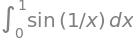

In [104]:
expr = sp.Integral(sp.sin(1/x), (x, 0, 1))
expr

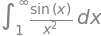

In [105]:
expr = expr.transform(x, 1/x)
expr

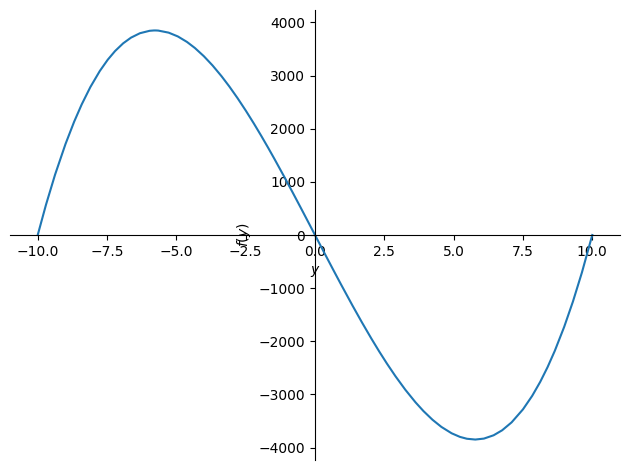

In [108]:
%matplotlib inline
x=10
sp.plotting.plot(x*y**3 - y*x**3)
pass

In [109]:
k = sp.Symbol("k", positive=True)
theta = sp.Symbol("theta", positive=True)
z = sp.Symbol("z")
X = sp.stats.Gamma("x", k, theta)

In [114]:
D = density(X)(z)
D

In [116]:
V = sp.stats.variance(X)
V

In [140]:
N = sp.stats.Normal('Gaussian', 10, 5)
z = sp.Symbol('z', real=True)
sp.stats.density(N)(z).simplify()

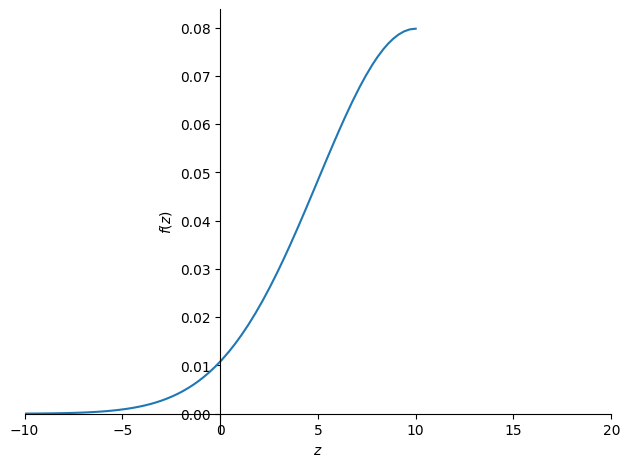

In [150]:
sp.plotting.plot(sp.stats.density(N)(z).simplify(), xlim=[-10,20])

In [151]:
density(N)(3).evalf()

In [155]:
sp.stats.P(N > 3)

In [159]:
sp.stats.sample(N)

# Pandas

In [161]:
age = pd.Series([23, 17, 22, 37, 42], name='years')
age

0    23
1    17
2    22
3    37
4    42
Name: years, dtype: int64

In [163]:
age.nsmallest(2)

1    17
2    22
Name: years, dtype: int64

In [164]:
species = pd.Series(['mouse', 'mouse', 'human', 'human', 'mouse', 'mouse'])

In [165]:
species.unique()

array(['mouse', 'human'], dtype=object)

In [166]:
species.str[2:4]

0    us
1    us
2    ma
3    ma
4    us
5    us
dtype: object

In [167]:
species.replace({'mosue': 'mus musculus', 'human': 'homo sapiens'}) # esto es sólo una vista.

0           mouse
1           mouse
2    homo sapiens
3    homo sapiens
4           mouse
5           mouse
dtype: object

In [168]:
species

0    mouse
1    mouse
2    human
3    human
4    mouse
5    mouse
dtype: object

In [169]:
species = species.astype('category')

In [170]:
species

0    mouse
1    mouse
2    human
3    human
4    mouse
5    mouse
dtype: category
Categories (2, object): ['human', 'mouse']

In [172]:
species.cat.codes

0    1
1    1
2    0
3    0
4    1
5    1
dtype: int8

In [173]:
species.cat.categories

Index(['human', 'mouse'], dtype='object')

In [179]:
import numpy as np
val2 = np.random.normal(15, 1, 6)
val2

array([15.32162684, 13.55079213, 15.29964248, 14.72101351, 15.57155838,
       14.27185515])

array([13.41304117, 14.85674283, 15.96720144, 14.24482278, 15.65508641,
       13.60348527])

In [187]:
d = collections.OrderedDict()
d['pid'] = ['1', '1', '1', '1', '1', '1', '2', '2', '2', '2']
d['visit'] = ['1', '1', '2', '2', '3', '3', '1', '1', '2', '2']
d['stim'] = ['cmv', 'hiv', 'cmv', 'hiv', 'cmv', 'hiv', 'cmv', 'hiv', 'cmv', 'hiv']
d['tnf'] = [1.0, 2.0, 1.1, 2.1, 1.2, 2.2, 3, 4, 3.1, 4.1]
d['ifn'] = [11.0, 12.0, 11.1, 12.1, 11.2, 12.2, 13, 14, 13.1, 14.1]
d['il2'] = [0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.1, 0.3, 0.1, 0.1]
df = pd.DataFrame(d)
df

,pid,visit,stim,tnf,ifn,il2
0,1,1,cmv,1.0,11.0,0.0
1,1,1,hiv,2.0,12.0,0.0
2,1,2,cmv,1.1,11.1,0.1
3,1,2,hiv,2.1,12.1,0.1
4,1,3,cmv,1.2,11.2,0.2
5,1,3,hiv,2.2,12.2,0.2
6,2,1,cmv,3.0,13.0,0.1
7,2,1,hiv,4.0,14.0,0.3
8,2,2,cmv,3.1,13.1,0.1
9,2,2,hiv,4.1,14.1,0.1


In [188]:
long1 = pd.melt(df, id_vars =['pid', 'stim', 'visit'])
long1

,pid,stim,visit,variable,value
0,1,cmv,1,tnf,1.0
1,1,hiv,1,tnf,2.0
2,1,cmv,2,tnf,1.1
3,1,hiv,2,tnf,2.1
4,1,cmv,3,tnf,1.2
5,1,hiv,3,tnf,2.2
6,2,cmv,1,tnf,3.0
7,2,hiv,1,tnf,4.0
8,2,cmv,2,tnf,3.1
9,2,hiv,2,tnf,4.1


In [192]:
df_multiindex = df.set_index(['pid', 'visit', 'stim'])
df_multiindex

tnf   ifn  il2
pid visit stim                
1   1     cmv   1.0  11.0  0.0
          hiv   2.0  12.0  0.0
    2     cmv   1.1  11.1  0.1
          hiv   2.1  12.1  0.1
    3     cmv   1.2  11.2  0.2
          hiv   2.2  12.2  0.2
2   1     cmv   3.0  13.0  0.1
          hiv   4.0  14.0  0.3
    2     cmv   3.1  13.1  0.1
          hiv   4.1  14.1  0.1

In [198]:
df_multiindex[['tnf']] # me da index/value pero ahora los index son grandes.

tnf
pid visit stim     
1   1     cmv   1.0
          hiv   2.0
    2     cmv   1.1
          hiv   2.1
    3     cmv   1.2
          hiv   2.2
2   1     cmv   3.0
          hiv   4.0
    2     cmv   3.1
          hiv   4.1

In [210]:
df_multiindex.loc[('2', '1')] # para filtrar por indices, ordenados.

,tnf,ifn,il2
stim,,,
cmv,3.0,13.0,0.1
hiv,4.0,14.0,0.3


In [211]:
df_multiindex.reset_index() #deshacer!

,pid,visit,stim,tnf,ifn,il2
0,1,1,cmv,1.0,11.0,0.0
1,1,1,hiv,2.0,12.0,0.0
2,1,2,cmv,1.1,11.1,0.1
3,1,2,hiv,2.1,12.1,0.1
4,1,3,cmv,1.2,11.2,0.2
5,1,3,hiv,2.2,12.2,0.2
6,2,1,cmv,3.0,13.0,0.1
7,2,1,hiv,4.0,14.0,0.3
8,2,2,cmv,3.1,13.1,0.1
9,2,2,hiv,4.1,14.1,0.1


In [215]:
# Quiero mover pid de columna a fila

# Para eso pid tiene que ser index antes.
df_multiindex.unstack('pid')
# Notar que pid quedó identificando las columnas. Lo unstackeó. Entonces los valores del index, 
# en este caso pid, se volvieron columnas para cada columna que había antes.

tnf        ifn        il2     
pid           1    2     1     2    1    2
visit stim                                
1     cmv   1.0  3.0  11.0  13.0  0.0  0.1
      hiv   2.0  4.0  12.0  14.0  0.0  0.3
2     cmv   1.1  3.1  11.1  13.1  0.1  0.1
      hiv   2.1  4.1  12.1  14.1  0.1  0.1
3     cmv   1.2  NaN  11.2   NaN  0.2  NaN
      hiv   2.2  NaN  12.2   NaN  0.2  NaN

You are given three DataFrames d1, d2, and d3.

In [216]:
d1 = pd.DataFrame({'subject': ['a', 'b', 'c', 'd'], 'group': ['A', 'B', 'C', 'D'], 'value': [1, 2, 3, 4]})
d2 = pd.DataFrame({'subject': ['w', 'x', 'y', 'z'], 'group': ['A', 'B', 'C', 'D'], 'value': [2, 1, 4, 3]})
d3 = pd.DataFrame({'subject': ['a', 'x', 'w', 'd', 'b', 'c', 'y', 'z'], 'age': [10, 20, 30, 40, 50, 60, 70, 80]})

Combine d1 and d2 to create a DataFrame called df1 with 8 rows and 3 columns.

In [223]:
df1 = pd.concat([d1, d2], axis=0)
df1

,subject,group,value
0,a,A,1
1,b,B,2
2,c,C,3
3,d,D,4
0,w,A,2
1,x,B,1
2,y,C,4
3,z,D,3


Combine df1 with d3 to create a DataFrame called df2 with 8 rows and 4 columns.

In [224]:
df2 = pd.merge(left=df1, right=d3, on='subject')
df2

,subject,group,value,age
0,a,A,1,10
1,b,B,2,50
2,c,C,3,60
3,d,D,4,40
4,w,A,2,30
5,x,B,1,20
6,y,C,4,70
7,z,D,3,80


Convert the given DataFrame fd from wide to tall format and save in df.

In [226]:
subject = ['ann', 'bob', 'charles', 'david', 'ella']
sex = ['F', 'M', 'M', 'M', 'F']
group = ['A', 'A', 'A', 'B', 'B']
age = [23, 34, 27, 30, 27]
score = [89, 90, 78, 98, 90]
df = pd.DataFrame(data = {'name': subject, 'sex': sex, 'age': age, 'group': group, 'score': score})

In [227]:
df.dtypes

name     object
sex      object
age       int64
group    object
score     int64
dtype: object

In [236]:
df.iloc[0,0]

'ann'

In [239]:
df.sort_values(['age', 'score'], ascending = [True, True])

,name,sex,age,group,score
0,ann,F,23,A,89
2,charles,M,27,A,78
4,ella,F,27,B,90
3,david,M,30,B,98
1,bob,M,34,A,90


In [240]:
df['adjusted_score'] = np.where(df.sex == 'M', df.score - 10, df.score)
df

,name,sex,age,group,score,adjusted_score
0,ann,F,23,A,89,89
1,bob,M,34,A,90,80
2,charles,M,27,A,78,68
3,david,M,30,B,98,88
4,ella,F,27,B,90,90


In [242]:
df.mean(numeric_only=True)

age               28.2
score             89.0
adjusted_score    83.0
dtype: float64

In [243]:
df.score.var()

In [244]:
df.describe()

,age,score,adjusted_score
count,5.000000,5.000000,5.000000
mean,28.200000,89.000000,83.000000
std,4.086563,7.141428,9.273618
min,23.000000,78.000000,68.000000
25%,27.000000,89.000000,80.000000
50%,27.000000,90.000000,88.000000
75%,30.000000,90.000000,89.000000
max,34.000000,98.000000,90.000000


In [247]:
grouped = df.groupby('sex')
grouped.groups # me da el diccionario de grupo:indexes

{'F': [0, 4], 'M': [1, 2, 3]}

In [248]:
df.groupby('sex').count()

,name,age,group,score,adjusted_score
sex,,,,,
F,2,2,2,2,2
M,3,3,3,3,3


In [250]:
df.groupby('sex').mean(numeric_only=True)

,age,score,adjusted_score
sex,,,
F,25.000000,89.500000,89.500000
M,30.333333,88.666667,78.666667


In [252]:
df.groupby(['sex', 'group']).mean(numeric_only=True)

age  score  adjusted_score
sex group                             
F   A      23.0   89.0            89.0
    B      27.0   90.0            90.0
M   A      30.5   84.0            74.0
    B      30.0   98.0            88.0

In [263]:
df.groupby(['sex', 'group']).agg(['count', 'sum'])

name               age     score      adjusted_score     
          count         sum count sum count  sum          count  sum
sex group                                                           
F   A         1         ann     1  23     1   89              1   89
    B         1        ella     1  27     1   90              1   90
M   A         2  bobcharles     2  61     2  168              2  148
    B         1       david     1  30     1   98              1   88

In [264]:
grouped[['age', 'score']].agg('mean')

,age,score
sex,,
F,25.000000,89.500000
M,30.333333,88.666667


In [265]:
grouped.get_group('F')

,name,sex,age,group,score,adjusted_score
0,ann,F,23,A,89,89
4,ella,F,27,B,90,90


Pivot tables

In [266]:
d = collections.OrderedDict()
d['pid'] = ['1', '1', '1', '1', '1', '1', '2', '2', '2', '2']
d['visit'] = ['1', '1', '2', '2', '3', '3', '1', '1', '2', '2']
d['stim'] = ['cmv', 'hiv', 'cmv', 'hiv', 'cmv', 'hiv', 'cmv', 'hiv', 'cmv', 'hiv']
d['tnf'] = [1.0, 2.0, 1.1, 2.1, 1.2, 2.2, 3, 4, 3.1, 4.1]
d['ifn'] = [11.0, 12.0, 11.1, 12.1, 11.2, 12.2, 13, 14, 13.1, 14.1]
d['il2'] = [0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.1, 0.3, 0.1, 0.1]
df = pd.DataFrame(d)

In [267]:
df

,pid,visit,stim,tnf,ifn,il2
0,1,1,cmv,1.0,11.0,0.0
1,1,1,hiv,2.0,12.0,0.0
2,1,2,cmv,1.1,11.1,0.1
3,1,2,hiv,2.1,12.1,0.1
4,1,3,cmv,1.2,11.2,0.2
5,1,3,hiv,2.2,12.2,0.2
6,2,1,cmv,3.0,13.0,0.1
7,2,1,hiv,4.0,14.0,0.3
8,2,2,cmv,3.1,13.1,0.1
9,2,2,hiv,4.1,14.1,0.1


In [268]:
df.pivot_table(values = ['tnf', 'ifn', 'il2'], index = ['stim'], aggfunc = 'mean')

,ifn,il2,tnf
stim,,,
cmv,11.88,0.10,1.88
hiv,12.88,0.14,2.88


In [271]:
df.groupby(['stim']).mean(numeric_only=True)

,tnf,ifn,il2
stim,,,
cmv,1.88,11.88,0.10
hiv,2.88,12.88,0.14


In [272]:
df.pivot_table(values = ['tnf', 'ifn', 'il2'], index = ['stim']) # El mean era innecesario?

,ifn,il2,tnf
stim,,,
cmv,11.88,0.10,1.88
hiv,12.88,0.14,2.88


In [273]:
df.pivot_table(values = ['tnf', 'ifn', 'il2'], index = ['pid'], aggfunc = 'mean')

,ifn,il2,tnf
pid,,,
1,11.60,0.10,1.60
2,13.55,0.15,3.55


In [274]:
df.pivot_table(values = ['tnf', 'ifn', 'il2'], index = ['pid', 'stim'])

ifn  il2   tnf
pid stim                  
1   cmv   11.10  0.1  1.10
    hiv   12.10  0.1  2.10
2   cmv   13.05  0.1  3.05
    hiv   14.05  0.2  4.05